#PREREQUIZITE: MACHINE LEARNING (ES 335)
##RUDDHI SHAH (ROLL NO: 24120017)

##Question 1:
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

##Solution 1:

Let [M1] be (n,k) matrix
Let [M2] be (k,m) matrix
Let [M3] (n,m) = [M1]*[M2] be the multiplication matrix.

1. [M3] will have n*m elements.
2. For each element in [M3], we need to perform k multiplcation operations and (k-1) addition operations.
3. Hence, we will have to perform n*m*k multiplications and n*m*(k-1) additions.


## Question 2:
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

##Solution 2:


In [2]:
import time
M1 = [[1,2,3],[1,2,3],[1,2,3]]
M2 = [[1,2,3],[1,2,3],[1,2,3]]
M3 = [[0,0,0],[0,0,0],[0,0,0]]
M4 = [[0,0,0],[0,0,0],[0,0,0]]

st1 = time.time()
for i1 in range(len(M1)):
  for j1 in range(len(M2[0])):
    for k1 in range(len(M2)):
      M3[i1][j1] += M1[i1][k1] * M2[k1][j1]
et1 = time.time()
print(M3," Time: ",et1-st1)

st2 = time.time()
M4 = [[sum(a*b for a,b in zip(M1_row,M2_col)) for M2_col in zip(*M2)] for M1_row in M1]
et2 = time.time()
print(M4," Time: ",et2-st2)



[[6, 12, 18], [6, 12, 18], [6, 12, 18]]  Time:  0.00020384788513183594
[[6, 12, 18], [6, 12, 18], [6, 12, 18]]  Time:  0.00023984909057617188


In [7]:
import numpy
NM1 = numpy.matrix([[1,2,3],[1,2,3],[1,2,3]])
NM2 = numpy.matrix([[1,2,3],[1,2,3],[1,2,3]])
st3 = time.time()
NM3 = NM1 * NM2
et3 = time.time()
st4 = time.time()
NM4 = NM1.dot(NM2)
et4 = time.time()
print(NM3," Time: ",et3-st3)
print(NM4," Time: ",et4-st4)


[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]  Time:  0.00012302398681640625
[[ 6 12 18]
 [ 6 12 18]
 [ 6 12 18]]  Time:  8.726119995117188e-05


Numpy matrix multiplcation runs faster. However, the dot method is consuming more time.

##Question 3:
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?
##Solution 3:
In the  first  approach, we need index of median passes, so O(n*indexofMedian), similar to O(n2) time would be needed.
But, if we first sort the array, which takes O(nlogn) complexity and then find the median, then it will be faster.
Using Arrays.sort(): O(nlogn)
Using Randomized QuickSelect: O(n)

In [11]:

a1 = [1, 2, 4, 3, 5]
na1 = len(a1)
a1.sort()

if na1 % 2 == 0:
    median1 = a1[na1//2]
    median2 = a1[na1//2 - 1]
    median = (median1 + median2)/2
else:
    median = a1[na1//2]
print("Median is: " + str(median))

Median is: 3


In [12]:
import random

a, b = None, None;

def Partition(arr, l, r) :

	lst = arr[r]; i = l; j = l;
	while (j < r) :
		if (arr[j] < lst) :
			arr[i], arr[j] = arr[j],arr[i];
			i += 1;

		j += 1;

	arr[i], arr[r] = arr[r],arr[i];
	return i;

def randomPartition(arr, l, r) :
	n = r - l + 1;
	pivot = random.randrange(1, 100) % n;
	arr[l + pivot], arr[r] = arr[r], arr[l + pivot];
	return Partition(arr, l, r);

def MedianUtil(arr, l, r,
				k, a1, b1) :

	global a, b;

	if (l <= r) :

		partitionIndex = randomPartition(arr, l, r);

		if (partitionIndex == k) :
			b = arr[partitionIndex];
			if (a1 != -1) :
				return;

			if (b1 != -1) :
				return;

		if (partitionIndex >= k) :
			return MedianUtil(arr, l,
                              partitionIndex - 1, k, a, b);

		else :
			return MedianUtil(arr,
                              partitionIndex + 1, r, k, a, b);

	return;

def findMedian(arr, n) :
	global a;
	global b;
	a = -1;
	b = -1;

	if (n % 2 == 1) :
		MedianUtil(arr, 0, n - 1, n // 2, a, b);
		ans = b;

	else :
		MedianUtil(arr, 0, n - 1, n // 2, a, b);
		ans = (a + b) // 2;

	print(ans);

arr = [ 1, 8, 3, 12, 2, 10, 4, 14  ];
n = len(arr);
findMedian(arr, n);




3


##Question 4:
What is the gradient of the following function with respect to x and y?

## Solution 4:

##Question 5:
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

##Solution 5:

In [39]:
import jax.numpy as jnp
from jax import grad
import math

def f(x, y):
    # a = math.sin(math.radians(x))
    # return (x**2)*y + (y**3)*a
    return (x**2) + (y**2)

grad_f = grad(f, argnums=(0, 1))
print(grad_f)
x_val, y_val = 2.0, 3.0
grad_jax = grad_f(x_val, y_val)
print("Gradient using JAX:", grad_jax)


<function f at 0x7c45d5a85000>
Gradient using JAX: (Array(4., dtype=float32, weak_type=True), Array(6., dtype=float32, weak_type=True))


##Question 6:
Use sympy to confirm that you obtain the same gradient analytically.

##Solution 6:

In [16]:
import sympy as sp

x, y = sp.symbols('x y')
f_sympy = x**2 + y**2
grad_sympy = [sp.diff(f_sympy, var) for var in (x, y)]
print("Gradient using SymPy:", grad_sympy)

grad_sympy_eval = [g.subs({x: x_val, y: y_val}) for g in grad_sympy]
print("Evaluated gradient using SymPy:", grad_sympy_eval)

Gradient using SymPy: [2*x, 2*y]
Evaluated gradient using SymPy: [4.00000000000000, 6.00000000000000]


##Question 7:
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

##Solution 7:

In [37]:
students = {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'a', 'Marks': {'Maths': 40, 'English': 70}},
            {'Roll Number': 2, 'Name': 'b', 'Marks': {'Maths': 40, 'English': 80}},
        ],
        'Branch 2': [
            {'Roll Number': 3, 'Name': 'c', 'Marks': {'Maths': 85, 'English': 75}},
        ]
    },
    2023: {
        'Branch 1': [],
        'Branch 2': []
    },
    2024: {
        'Branch 1': [],
        'Branch 2': []
    },
    2025: {
        'Branch 1': [],
        'Branch 2': []
    }
}

##Question 8:
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

##Solution 8:

In [18]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch):
        self.branches[branch.name] = branch

class Database:
    def __init__(self):
        self.years = {}

    def add_year(self, year):
        self.years[year.year] = year

##Question 9:
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
##Solution 9:




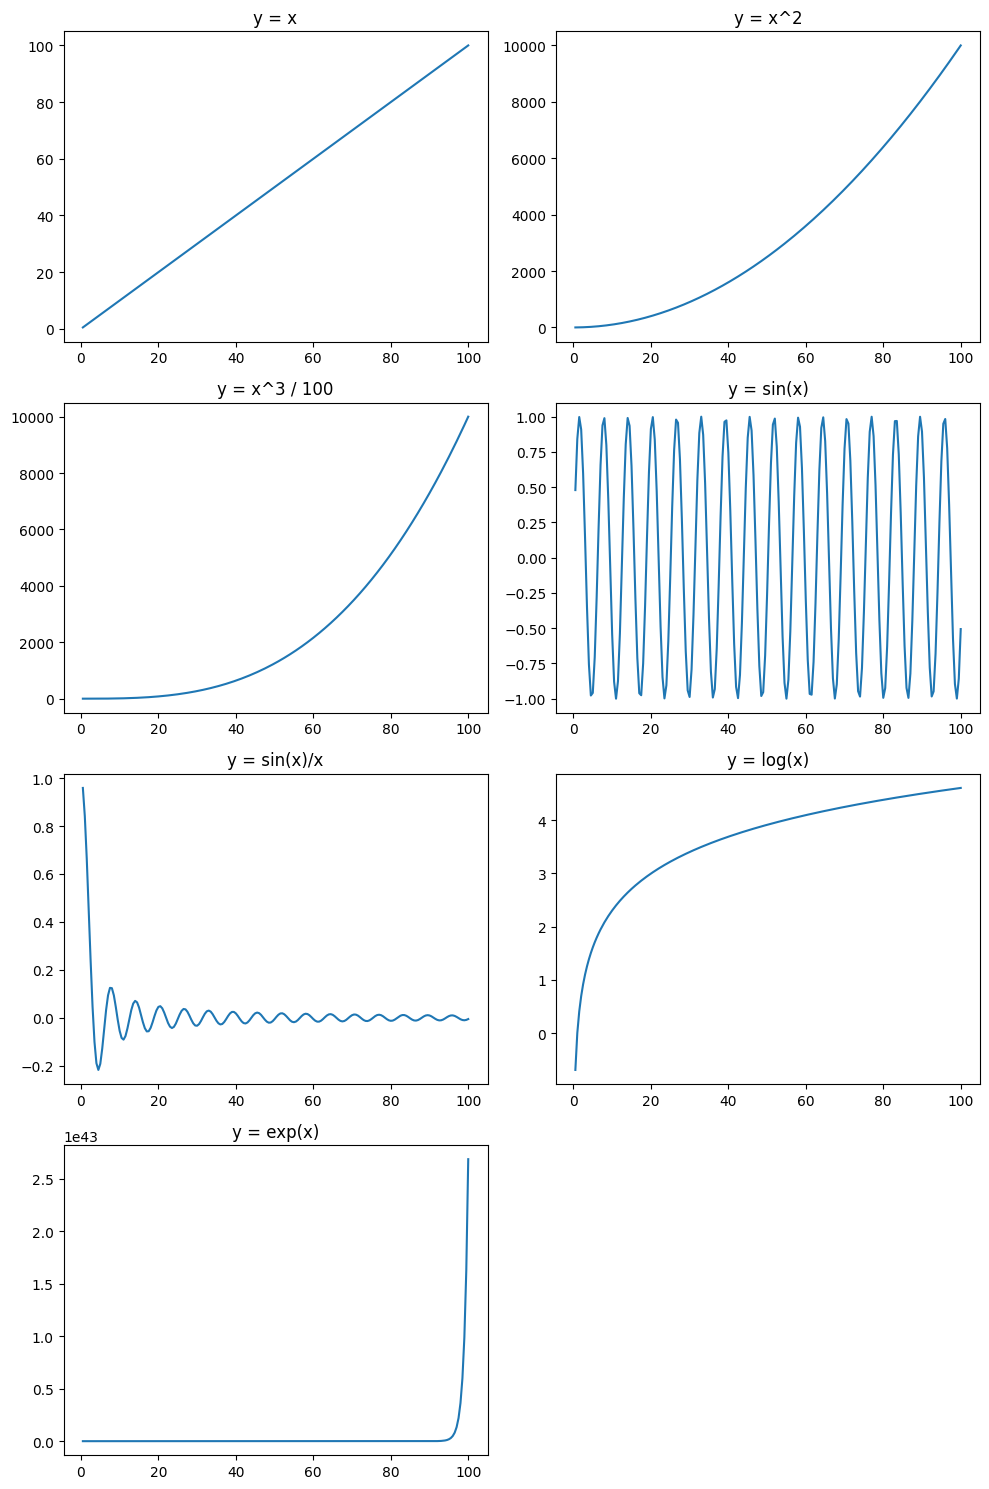

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(10, 15))

plt.subplot(4, 2, 1)
plt.plot(x, y1)
plt.title('y = x')

plt.subplot(4, 2, 2)
plt.plot(x, y2)
plt.title('y = x^2')

plt.subplot(4, 2, 3)
plt.plot(x, y3)
plt.title('y = x^3 / 100')

plt.subplot(4, 2, 4)
plt.plot(x, y4)
plt.title('y = sin(x)')

plt.subplot(4, 2, 5)
plt.plot(x, y5)
plt.title('y = sin(x)/x')

plt.subplot(4, 2, 6)
plt.plot(x, y6)
plt.title('y = log(x)')

plt.subplot(4, 2, 7)
plt.plot(x, y7)
plt.title('y = exp(x)')

plt.tight_layout()
plt.show()


## Question 10:
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.
## Solution 10:


In [20]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

highest_std_col = df.std().idxmax()

lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with highest standard deviation:", highest_std_col)
print("Row with lowest mean:", lowest_mean_row)

Column with highest standard deviation: d
Row with lowest mean: 15


## Question 11:
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.
## Solution 11:


In [24]:
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

df["f"] = df.sum(axis=1)

df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

num_lt8 = df[df["g"] == "LT8"].shape[0]

std_f_lt8 = df[df["g"] == "LT8"]["f"].std()
std_f_gt8 = df[df["g"] == "GT8"]["f"].std()

print("Number of rows where 'g' is 'LT8':", num_lt8)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_f_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_f_gt8)


Number of rows where 'g' is 'LT8': 14
Standard deviation of 'f' where 'g' is 'LT8': 0.3497101769444867
Standard deviation of 'f' where 'g' is 'GT8': 0.20083646676089112


## Question 12:
Write a small piece of code to explain broadcasting in numpy.
## Solution 12:


In [25]:
import numpy as np

A = np.array([1, 2, 3])
B = np.array([[1], [2], [3]])

result = A + B

print("A:", A)
print("B:", B)
print("Result of broadcasting A + B:", result)


A: [1 2 3]
B: [[1]
 [2]
 [3]]
Result of broadcasting A + B: [[2 3 4]
 [3 4 5]
 [4 5 6]]


##Question 13:
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.
##Solution 13:


In [26]:
import numpy as np

def custom_argmin(arr):
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i
    return min_index

arr = np.random.randint(1, 100, size=10)

custom_min_index = custom_argmin(arr)
numpy_min_index = np.argmin(arr)

print("Array:", arr)
print("Custom argmin index:", custom_min_index)
print("Numpy argmin index:", numpy_min_index)


Array: [37 60 87 95 80 44 13 67 98 43]
Custom argmin index: 6
Numpy argmin index: 6
